In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from datetime import datetime
import time
import pytz

import MetaTrader5 as mt5

# 2. Estrutura básica do MetaTrader 5 (MT5) usando Python
### 2.1 Integração do MT5 ao Python

In [13]:
mt5.initialize()

True

In [14]:
# Número de símbolos ativos no meu MT5
mt5.symbols_total()

191505

In [15]:
symbols = mt5.symbols_get()
print('Total símbolos: ', len(symbols))

Total símbolos:  191505


In [17]:
PETR_symbols = mt5.symbols_get('*VALE3*')
print('Total símbolos VALE3: ', len(PETR_symbols))
for i in PETR_symbols[0:10]:
    print(i.name)

Total símbolos VALE3:  6
VALE3
VALE3F
VALE3SL
VALE3T
@VALE3
UD:VALE3W910001


## 2.2 Configurar os ativos desejados

In [18]:
ativo = 'VALE3'
selected = mt5.symbol_select(ativo, True)
if not selected:
    print(ativo, 'não encontrado')

In [19]:
symbol_info = mt5.symbol_info(ativo)
if symbol_info != None:
    print('Informações gerais de', ativo, ':')
    symbol_info_dict = mt5.symbol_info(ativo)._asdict()
    for prop in symbol_info_dict:
        print(' {}={}'.format(prop, symbol_info_dict[prop]))

Informações gerais de VALE3 :
 custom=False
 chart_mode=1
 select=True
 visible=True
 session_deals=80004
 session_buy_orders=0
 session_sell_orders=0
 volume=100
 volumehigh=627000
 volumelow=100
 time=1656700840
 digits=2
 spread=1
 spread_float=True
 ticks_bookdepth=16
 trade_calc_mode=32
 trade_mode=4
 start_time=0
 expiration_time=0
 trade_stops_level=0
 trade_freeze_level=0
 trade_exemode=3
 swap_mode=0
 swap_rollover3days=3
 margin_hedged_use_leg=False
 expiration_mode=11
 filling_mode=3
 order_mode=127
 order_gtc_mode=0
 option_mode=0
 option_right=0
 bid=75.07
 bidhigh=85.9
 bidlow=73.8
 ask=75.08
 askhigh=76.4
 asklow=73.81
 last=75.07
 lasthigh=76.53
 lastlow=73.8
 volume_real=100.0
 volumehigh_real=627000.0
 volumelow_real=100.0
 option_strike=0.0
 point=0.01
 trade_tick_value=0.01
 trade_tick_value_profit=0.01
 trade_tick_value_loss=0.01
 trade_tick_size=0.01
 trade_contract_size=1.0
 trade_accrued_interest=0.0
 trade_face_value=0.0
 trade_liquidity_rate=0.0
 volume_min=10

In [20]:
lasttick = mt5.symbol_info_tick(ativo)
print('Último tick de', ativo, ':')
symbol_info_tick_dict = mt5.symbol_info_tick(ativo)._asdict()
for prop in symbol_info_tick_dict:
    print(' {}={}'.format(prop, symbol_info_tick_dict[prop]))

Último tick de VALE3 :
 time=1656700840
 bid=75.07
 ask=75.08
 last=75.07
 volume=100
 time_msc=1656700840588
 flags=30
 volume_real=100.0


In [6]:
# Criar uma rotina onde faremos um loop para obtermos 3x os dados do book de ofertas
# Vamos realizar uma pausa de 5 segundos entre cada acesso e encerrar a rotina

# Receber notificações sobre a mudança no book de ofertas
ativo = 'PETR3'
mt5.market_book_add(ativo)

if mt5.market_book_add(ativo):
    for i in range(3):
        items = mt5.market_book_get(ativo)
        if items:
            for it in items:
                print(it._asdict())

        print('---------------')
        time.sleep(5)
    mt5.market_book_release(ativo)
else:
    print('Falha ao acessar o book de ofertas de ', ativo, ' - erro: ', mt5.last_error())

---------------
{'type': 1, 'price': 31.64, 'volume': 200, 'volume_dbl': 200.0}
{'type': 1, 'price': 31.62, 'volume': 2500, 'volume_dbl': 2500.0}
{'type': 1, 'price': 31.6, 'volume': 1300, 'volume_dbl': 1300.0}
{'type': 1, 'price': 31.55, 'volume': 1200, 'volume_dbl': 1200.0}
{'type': 1, 'price': 31.54, 'volume': 200, 'volume_dbl': 200.0}
{'type': 1, 'price': 31.52, 'volume': 500, 'volume_dbl': 500.0}
{'type': 1, 'price': 31.5, 'volume': 7300, 'volume_dbl': 7300.0}
{'type': 1, 'price': 31.48, 'volume': 1000, 'volume_dbl': 1000.0}
{'type': 1, 'price': 31.44, 'volume': 200, 'volume_dbl': 200.0}
{'type': 1, 'price': 31.42, 'volume': 100, 'volume_dbl': 100.0}
{'type': 1, 'price': 31.41, 'volume': 500, 'volume_dbl': 500.0}
{'type': 1, 'price': 31.36, 'volume': 3300, 'volume_dbl': 3300.0}
{'type': 1, 'price': 31.35, 'volume': 1000, 'volume_dbl': 1000.0}
{'type': 1, 'price': 31.34, 'volume': 2000, 'volume_dbl': 2000.0}
{'type': 1, 'price': 31.32, 'volume': 2000, 'volume_dbl': 2000.0}
{'type':

## 2.3 Extrair cotações históricas
É preciso ajustar o fuso horário dos dados do MT5 (estão em UTC - Coordinated Universal Time)

O horário de Brasília = UTC - 3h. No caso da lib pytz, "America/Sao_Paulo"

Primeiro listamos os fusos 'mais comuns'

In [5]:
pytz.common_timezones[0:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [7]:
# Horário oficial de Brasília
timezone = pytz.timezone('America/Sao_Paulo')

# Definir data inicial e data final
data_inicio = datetime(2022, 1, 1, tzinfo=timezone)
data_fim = datetime(2022, 2, 19, tzinfo=timezone)

# Informar o ativo, o timeframe e a data inicial e final
cotacoes = mt5.copy_rates_range(ativo, mt5.TIMEFRAME_M5, data_inicio, data_fim)
cotacoes[0:10]

array([(1641204000, 25.78, 25.9 , 25.72, 25.79, 332, 0, 115800),
       (1641204300, 25.81, 25.9 , 25.77, 25.87, 377, 1, 103100),
       (1641204600, 25.88, 26.01, 25.87, 26.01, 382, 1,  88400),
       (1641204900, 25.99, 26.16, 25.99, 26.15, 296, 1, 105200),
       (1641205200, 26.15, 26.27, 26.13, 26.24, 294, 1, 153100),
       (1641205500, 26.24, 26.28, 26.19, 26.21, 291, 1, 119400),
       (1641205800, 26.22, 26.23, 26.2 , 26.23, 520, 1, 221700),
       (1641206100, 26.21, 26.23, 26.09, 26.12, 582, 1, 260700),
       (1641206400, 26.12, 26.18, 26.05, 26.08, 621, 1, 271000),
       (1641206700, 26.06, 26.08, 26.03, 26.06, 148, 1,  40100)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [12]:
# Transformar em dataframe
cotacoes_df = pd.DataFrame(cotacoes)
cotacoes_df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,1641204000,25.78,25.90,25.72,25.79,332,0,115800
1,1641204300,25.81,25.90,25.77,25.87,377,1,103100
2,1641204600,25.88,26.01,25.87,26.01,382,1,88400
3,1641204900,25.99,26.16,25.99,26.15,296,1,105200
4,1641205200,26.15,26.27,26.13,26.24,294,1,153100


In [13]:
# Transformar a coluna time em data hora padrão
cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
cotacoes_df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-01-03 10:00:00,25.78,25.90,25.72,25.79,332,0,115800
1,2022-01-03 10:05:00,25.81,25.90,25.77,25.87,377,1,103100
2,2022-01-03 10:10:00,25.88,26.01,25.87,26.01,382,1,88400
3,2022-01-03 10:15:00,25.99,26.16,25.99,26.15,296,1,105200
4,2022-01-03 10:20:00,26.15,26.27,26.13,26.24,294,1,153100
...,...,...,...,...,...,...,...,...
3347,2022-02-18 17:45:00,30.01,30.04,29.99,30.04,240,1,136900
3348,2022-02-18 17:50:00,30.04,30.06,29.97,30.03,426,1,659300
3349,2022-02-18 18:05:00,29.99,29.99,29.99,29.99,160,0,1696900
3350,2022-02-18 19:05:00,29.93,30.03,29.93,29.93,8,0,4500


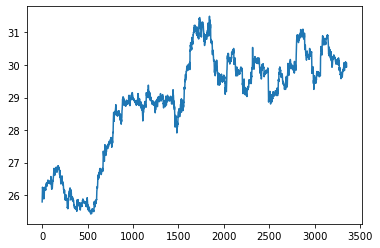

In [14]:
cotacoes_df.close.plot();

In [15]:
# Tranformar o índice em data
cotacoes_df.index = cotacoes_df['time']
cotacoes_df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2022-01-03 10:00:00,2022-01-03 10:00:00,25.78,25.90,25.72,25.79,332,0,115800
2022-01-03 10:05:00,2022-01-03 10:05:00,25.81,25.90,25.77,25.87,377,1,103100
2022-01-03 10:10:00,2022-01-03 10:10:00,25.88,26.01,25.87,26.01,382,1,88400
2022-01-03 10:15:00,2022-01-03 10:15:00,25.99,26.16,25.99,26.15,296,1,105200
2022-01-03 10:20:00,2022-01-03 10:20:00,26.15,26.27,26.13,26.24,294,1,153100


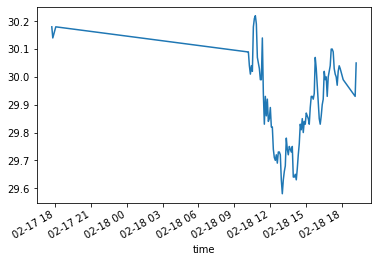

In [16]:
cotacoes_df[-100:].close.plot();

In [17]:
fig_cotacoes = go.Figure(data=[go.Candlestick(name='PETR3', x=cotacoes_df.index, open=cotacoes_df.open, high=cotacoes_df.high, low=cotacoes_df.low, close=cotacoes_df.close)])
fig_cotacoes.update_xaxes(title_text='<b> Data',
                            rangebreaks=[dict(bounds=['sat', 'mon']), dict(bounds=[18, 10], pattern='hour'), dict(values=['2021-12-25', '2022-01-01', '2022-01-02'])])
fig_cotacoes.update_yaxes(title_text='<b> Preço do Ativo R$')
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Gráfico Candlestick', template='simple_white')
fig_cotacoes.show()

## 2.4 Checar posição atual e ordens pendentes

In [18]:
# Checar a moeda configurada na conta
account_currency = mt5.account_info().currency
print('Moeda configurada:', account_currency)

Moeda configurada: BRL


In [19]:
# Verificar presença de ordens pendentes
orders = mt5.orders_total()
if orders > 0:
    print('Total de ordens =', orders)
else:
    print('Nenhuma ordem encontrada')

Nenhuma ordem encontrada


In [21]:
# Detalhar uma ordem relativa a um ativo específico
ativo = 'MGLU3'
orders = mt5.orders_get(symbol=ativo)
if orders is None:
    print('Nenhuma ordem encontrada para o ativo', ativo, '- erro: ', mt5.last_error())
else:
    print('Total de ordens para o ativo', ativo, '=', len(orders))
    # Exibir todas as ordens ativas
    for order in orders:
        print(order)

Nenhuma ordem encontrada para o ativo MGLU3 - erro:  (-10001, 'IPC send failed')


## 2.5 Configurar uma ordem de compra a mercado

In [46]:
symbol = 'VALE3'
mt5.symbol_select(symbol, True)
symbol_info = mt5.symbol_info(symbol)
symbol_info

SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=47242, session_buy_orders=0, session_sell_orders=0, volume=100, volumehigh=200000, volumelow=100, time=1656683522, digits=2, spread=1, spread_float=True, ticks_bookdepth=16, trade_calc_mode=32, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=11, filling_mode=3, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=74.43, bidhigh=76.37, bidlow=73.8, ask=74.44, askhigh=76.4, asklow=73.81, last=74.43, lasthigh=76.53, lastlow=73.8, volume_real=100.0, volumehigh_real=200000.0, volumelow_real=100.0, option_strike=0.0, point=0.01, trade_tick_value=0.01, trade_tick_value_profit=0.01, trade_tick_value_loss=0.01, trade_tick_size=0.01, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=100.0, volume_max=499

In [51]:
qtd = 500.0 # Sempre colocar número de ações ou contrato como float
tick_min = mt5.symbol_info(symbol).point
preco = mt5.symbol_info_tick(symbol).ask # Colocando a ordem a mercado (no preço do ask)
desvio_toler = 30 # offset de preço para a ordem (colocar int. Quando coloquei como float dá pau em order_check e order_send)

orderm_compra = {
    'action': mt5.TRADE_ACTION_DEAL, # Tipo de ordem (a mercado)
    'symbol': symbol, # Símbolo do ativo
    'volume': qtd, # Quantidade de ações ou contrato
    'type': mt5.ORDER_TYPE_BUY, # Tipo de ordem (compra a mercado)
    'price': preco, # preço de compra
    'sl': preco - 100 * tick_min, # preço de stop loss
    'tp': preco + 30 * tick_min, # preço de take profit
    'deviation': desvio_toler, # desvio de preço para a ordem (ordem offet)
    'type_time': mt5.ORDER_TIME_DAY, # tipo de tempo para a ordem (válida para o dia)
    'type_filling': mt5.ORDER_FILLING_RETURN, # ordem pode ser executada parcialmente e manter residual, não será realizada nova entrada
    'magic': 1, # número aleatório para identificar a ordem (opcional)
    'comment': 'Primeiros trades Python' # comentário da ordem (opcional)
}
mt5.order_check(orderm_compra)

OrderCheckResult(retcode=0, balance=0.0, equity=0.0, profit=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, comment='Done', request=TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=500.0, price=74.46, stoplimit=0.0, sl=73.46, tp=74.75999999999999, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0))

In [52]:
# Checar estrutura da ordem
result_compra = mt5.order_check(orderm_compra)
print(orderm_compra)
print('Estrutura da ordem de compra nu.', orderm_compra['magic'], ':', orderm_compra['comment'])
result_dict = result_compra._asdict()
for field in result_dict.keys():
    print(field, '=', result_dict[field])
    # se esta for uma estrutura de solicitação de negociação, conseguimos exibir também elemento a elemento
    if field == 'ordem_compra':
        traderequest_dict = result_dict[field]._asdict()
        for tradereq_field in traderequest_dict.keys():
            print(tradereq_field, '=', traderequest_dict[tradereq_field])

{'action': 1, 'symbol': 'VALE3', 'volume': 500.0, 'type': 0, 'price': 74.46, 'sl': 73.46, 'tp': 74.75999999999999, 'deviation': 30, 'type_time': 1, 'type_filling': 2, 'magic': 1, 'comment': 'Primeiros trades Python'}
Estrutura da ordem de compra nu. 1 : Primeiros trades Python
retcode = 0
balance = 0.0
equity = 0.0
profit = 0.0
margin = 0.0
margin_free = 0.0
margin_level = 0.0
comment = Done
request = TradeRequest(action=1, magic=1, order=0, symbol='VALE3', volume=500.0, price=74.46, stoplimit=0.0, sl=73.46, tp=74.75999999999999, deviation=30, type=0, type_filling=2, type_time=1, expiration=0, comment='Primeiros trades Python', position=0, position_by=0)


## 2.6 Enviar uma ordem de compra

In [53]:
# CUIDADO PARA NÃO EXECUTAR ESTE TESTE EM CONTA REAL !!!
#result_compra = mt5.order_send(orderm_compra)
print('Ordem de compra enviada para {},  {} ações a {} com tolerância de {}'.format(symbol, qtd, preco, desvio_toler));

# Se a ordem não pode ser enviadda, informar os detalhes
if result_compra.retcode != mt5.TRADE_RETCODE_DONE:
    print('Erro ao enviar ordem de compra:', mt5.ret_code_name(result_compra.retcode))
    result_dict = result_compra._asdict()
    for field in result_dict.keys():
        print('{} = {}'.format(field, result_dict[field]))
        if field == 'orderm_compra':
            traderequest_dict = result_dict[field]._asdict()
            for tradereq_field in traderequest_dict.keys():
                print('{} = {}'.format(tradereq_field, traderequest_dict[tradereq_field]))
    print('CANCELAR E FECHAR')
else:
    print('Ordem de compra enviada com sucesso - ', result_compra)
    print('      Position_Ticket={}'.format(result_compra.order))
    print('CANCELAR E FECHAR')

Ordem de compra enviada para VALE3,  500.0 ações a 74.46 com tolerância de 30


AttributeError: 'NoneType' object has no attribute 'retcode'

## 2.7 Verificar posições abertas

In [55]:
positions_total = mt5.positions_total()
if positions_total > 0:
    print('Total de posições =', positions_total)
else:
    print('Nenhuma posição encontrada')

Nenhuma posição encontrada


## 2.8 Ordem par encerrar a compra executada anteriormente

In [ ]:
position_id = result_compra.order

# Construir os parâmetros da ordem de compra
symbol = 'VALE3'
qtd = 500.0
position_id = result_compra.order
preco_sell = mt5.symbol_info_tick(symbol).bid
desvio_toler = 20

ordem_fechamento = {
    'action': mt5.TRADE_ACTION_DEAL,
    'symbol': symbol,
    'volume': qtd,
    'type': mt5.ORDER_TYPE_SELL,
    'position': position_id,
    'price': preco_sell,
    'deviation': desvio_toler,
    'magic': 1,
    'comment': 'Fechamento de posição',
    'type_time': mt5.ORDER_TIME_GTC,
    'type_filling': mt5.ORDER_FILLING_RETURN
}

# CUIDADO PARA NÃO ENVIAR A ORDEM DE FECHAMENTO EM CONTA REAL !!!
#result_fechamento = mt5.order_send(ordem_fechamento)

# Verificar o resultado da execuçãO
print('Fechamento posição #{}, venda {} {} ações a {} com tolerância de {}'.format(position_id, symbol, qtd, preco_sell, desvio_toler));

if result_fechamento.retcode != mt5.TRADE_RETCODE_DONE:
    print('Erro ao enviar ordem de fechamento:', mt5.ret_code_name(result_fechamento.retcode))
    result_dict = result_fechamento._asdict()
    for field in result_dict.keys():
        print('{} = {}'.format(field, result_dict[field]))
        if field == 'ordem_fechamento':
            traderequest_dict = result_dict[field]._asdict()
            for tradereq_field in traderequest_dict.keys():
                print('{} = {}'.format(tradereq_field, traderequest_dict[tradereq_field]))
    print('CANCELAR E FECHAR')
else:
    print('Ordem de fechamento enviada com sucesso - ', result_fechamento)
    print('      Position_Ticket={}'.format(result_fechamento.order))
    print('CANCELAR E FECHAR')

## 2.9 Histórico de ordens e trades

In [ ]:
# Histórico geral de ordens

from_date = datetime(2022, 1, 1)
to_date = datetime.now()

history_orders = mt5.history_orders_total(from_date, to_date)

if history_orders > 0:
    print('Total de ordens =', history_orders)
else:
    print('Nenhuma ordem encontrada')

In [ ]:
# Histórico de ordens para um ativo específico
history_orders = mt5.history_orders_get(from_date, to_date, group='*VALE3*')

if history_orders == None:
    print('Nenhuma ordem encontrada')
elif len(history_orders) > 0:
    print('history_orders_get({}, {}, group=\"*VALE3*\")={}'.format(from_date, to_date, len(history_orders)))

# Exibir essas posições como uma tabela usando pd.DataFrame()

df = pd.DataFrame(list(history_orders), columns=history_orders[0]._asdict().keys())
df['time_setup'] = pd.to_datetime(df['time_setup'], unit='s')
df['time_setup'] = pd.to_datetime(df['time_done'], unit='s')
print(df)

In [ ]:
# Histórico de trades para ativo específico
history_deals = mt5.history_deals_get(from_date, to_date, group='*VALE3*')
if history_deals == None:
    print('Nenhuma histórico de trades encontrado')
elif len(history_deals) > 0:
    print('history_deals_get({}, {}, group=\"*VALE3*\")={}'.format(from_date, to_date, len(history_deals)))

df = pd.DataFrame(list(history_deals), columns=history_deals[0]._asdict().keys())
df['time'] = pd.to_datetime(df['time'], unit='s')

# Trade automatizado (criando robôs com MT5 com Python)

In [8]:
# Definir data inicial e final
data_inicio = datetime(2022, 1, 1, tzinfo=timezone)
data_hora_atual = datetime.today()

In [9]:
import sys

count_cotacoes = 0
while count_cotacoes < 5:
    ativo = mt5.symbol_info_tick('VALE3')
    print('\r' + str(ativo.last))
    sys.stdout.flush()
    count_cotacoes += 1
    time.sleep(5)

75.07
75.07
75.07
75.07
75.07


In [29]:
symbol = 'VALE3'
cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M5, data_inicio, datetime.today())
cotacoes_df = pd.DataFrame(cotacoes_ativo)
cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
cotacoes_df.index = cotacoes_df['time']
cotacoes_df

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2022-01-03 10:05:00,2022-01-03 10:05:00,76.07,76.11,75.82,75.93,694,0,377100
2022-01-03 10:10:00,2022-01-03 10:10:00,75.94,76.39,75.87,76.07,1320,1,345900
2022-01-03 10:15:00,2022-01-03 10:15:00,76.07,76.38,76.04,76.19,947,1,235600
2022-01-03 10:20:00,2022-01-03 10:20:00,76.18,76.33,76.18,76.25,630,1,146300
2022-01-03 10:25:00,2022-01-03 10:25:00,76.26,76.36,76.21,76.33,667,1,189500
...,...,...,...,...,...,...,...,...
2022-07-01 17:35:00,2022-07-01 17:35:00,75.10,75.13,75.10,75.11,10,1,4400
2022-07-01 17:40:00,2022-07-01 17:40:00,75.12,75.12,75.10,75.10,20,1,7600
2022-07-01 17:45:00,2022-07-01 17:45:00,75.10,75.12,75.09,75.10,24,1,9500


In [30]:
# Calcular as médias móveis
MM_periodo_l = 9
MM_periodo_c = 3
MMA = cotacoes_df['close'].rolling(MM_periodo_l).mean()
MMA_c = cotacoes_df['close'].rolling(MM_periodo_c).mean()
cotacoes_df['MMA_9p'] = MMA
cotacoes_df['MMA_3p'] = MMA_c
cotacoes_df.tail()

,time,open,high,low,close,tick_volume,spread,real_volume,MMA_9p,MMA_3p
time,,,,,,,,,,
2022-07-01 17:35:00,2022-07-01 17:35:00,75.10,75.13,75.10,75.11,10,1,4400,75.213333,75.103333
2022-07-01 17:40:00,2022-07-01 17:40:00,75.12,75.12,75.10,75.10,20,1,7600,75.207778,75.103333
2022-07-01 17:45:00,2022-07-01 17:45:00,75.10,75.12,75.09,75.10,24,1,9500,75.181111,75.103333
2022-07-01 17:50:00,2022-07-01 17:50:00,75.11,75.17,75.08,75.15,44,1,28800,75.161111,75.116667
2022-07-01 17:55:00,2022-07-01 17:55:00,75.15,75.15,75.05,75.07,25,1,14900,75.130000,75.106667


In [33]:
# Plotar os últimos 10 candles com as médias móveis
cotacoes_df2 = cotacoes_df[-10:]
fig_cotacoes = go.Figure(data=go.Candlestick(name='VALE3', x=cotacoes_df2.index, open=cotacoes_df2['open'], high=cotacoes_df2['high'], low=cotacoes_df2['low'], close=cotacoes_df2['close']))
fig_cotacoes.add_trace(go.Scatter(name='MMA_9p', x=cotacoes_df2.index, y=cotacoes_df2['MMA_9p'], marker_color='blue'))
fig_cotacoes.add_trace(go.Scatter(name='MMA_3p', x=cotacoes_df2.index, y=cotacoes_df2['MMA_3p'], marker_color='red'))
fig_cotacoes.update_layout(xaxis_rangeslider_visible=False, title_text='Gráfio de Candlestick VALE3', template='simple_white', width=500, height=600)
fig_cotacoes.show()

In [34]:
contador_sinais = 0
posicao  = 0
while (contador_sinais < 10) and (posicao == 0):
    contador_sinais += 1
    print('-----------------------------------------------------')
    print('A hora atual é:', datetime.today())

    symbol = 'PETR4'
    cotacoes_ativo = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_M5, data_inicio, datetime.today())
    cotacoes_df = pd.DataFrame(cotacoes_ativo)
    cotacoes_df['time'] = pd.to_datetime(cotacoes_df['time'], unit='s')
    cotacoes_df.index = cotacoes_df['time']

    # Calcular as médias móveis
    MM_periodo_l = 5
    MMA = cotacoes_df['close'].rolling(MM_periodo_l).mean()
    cotacoes_df['MMA'] = MMA

    print('O preço de fechamento anterior havia sido de:', cotacoes_df.iloc[-2]['close'], 'e a média móvel estava em ', cotacoes_df.iloc[-2]['MMA'])
    print('O preço de fechamento atual foi', cotacoes_df.iloc[-1]['close'], 'e a média móvel está em ', cotacoes_df.iloc[-1]['MMA'])

    if (cotacoes_df.close[-1] > cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] < cotacoes_df.MMA[-2])):
        print('Sinal de compra')
        posicao = 1
        time.sleep(5)
    elif (cotacoes_df.close[-1] < cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] > cotacoes_df.MMA[-2])):
        print('Sinal de venda')
        posicao = -1
        time.sleep(5)
    else:
        print('Nenhum sinal')
        time.sleep(5)

-----------------------------------------------------
A hora atual é: 2022-07-01 19:36:56.609955
O preço de fechamento anterior havia sido de: 28.64 e a média móvel estava em  28.592000000000002
O preço de fechamento atual foi 28.58 e a média móvel está em  28.595999999999997
Sinal de venda


In [35]:
# Desenvolvimento da estratégia

contador_sinais = 0
posicao = 0

while(contador_sinais < 10) and (posicao == 0):
    contador_sinais += 1
    print('-----------------------------------------------------')
    print('A hora atual é:', datetime.today())

    symbol = 'BRML3'
    qtd = 100.0
    tick_min = mt5.symbol_info_tick(symbol).point
    preco_compra = mt5.symbol_info_tick(symbol).ask
    preco_venda = mt5.symbol_info_tick(symbol).bid
    desvio_toler = 0

    ordem_compra = {
        'action': mt5.TRADE_ACTION_DEAL,
        'symbol': symbol,
        'volume': qtd,
        'type': mt5.ORDER_TYPE_BUY,
        'price': preco_compra,
        'sl': preco_compra - 100 * tick_min,
        'tp': preco_compra + 100 * tick_min,
        'deviation': desvio_toler,
        'magic': 1,
        'comment': 'Estratégia MM100',
        'type_time': mt5.ORDER_TIME_DAY,
        'type_fillings': mt5.ORDER_FILLING_RETURN
    }

    ordem_venda = {
        'action': mt5.TRADE_ACTION_DEAL,
        'symbol': symbol,
        'volume': qtd,
        'type': mt5.ORDER_TYPE_SELL,
        'price': preco_venda,
        'sl': preco_venda + 100 * tick_min,
        'tp': preco_venda - 100 * tick_min,
        'deviation': desvio_toler,
        'magic': 1,
        'comment': 'Estratégia MM100',
        'type_time': mt5.ORDER_TIME_DAY,
        'type_fillings': mt5.ORDER_FILLING_RETURN
    }

    print('O preço de fechamento anterior foi', cotacoes_df.close[-2], 'e a média móvel estava em ', cotacoes_df.MMA[-2])
    print('O preço de fechamento attual foi de', cotacoes_df.close[-1], 'e a média móvel está em ', cotacoes_df.MMA[-1])

    if (cotacoes_df.close[-1] > cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] < cotacoes_df.MMA[-2])):
        print('Sinal de compra')
        #mt5.order_send(ordem_compra)
        print('Ordem executada com sucesso')
        posicao = 1
        time.sleep(5)
    elif (cotacoes_df.close[-1] < cotacoes_df.MMA[-1] and (cotacoes_df.close[-2] > cotacoes_df.MMA[-2])):
        print('Sinal de venda')
        #mt5.order_send(ordem_venda)
        print('Ordem executada com sucesso')
        posicao = -1
        time.sleep(5)
    else:
        print('Nenhum sinal')
        time.sleep(5)

-----------------------------------------------------
A hora atual é: 2022-07-01 19:49:30.287097


AttributeError: 'NoneType' object has no attribute 'point'